In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [32]:
iris = pd.read_csv('CSVs-Data/iris.csv')

features = iris.drop(columns='variety')

targets = iris.variety

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [34]:
iris_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

iris_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [35]:
feature_names = features.columns 
tree_rules = export_text(iris_clf, feature_names=list(feature_names))

print(tree_rules)

|--- petal.length <= 2.45
|   |--- class: Setosa
|--- petal.length >  2.45
|   |--- petal.width <= 1.75
|   |   |--- petal.length <= 5.35
|   |   |   |--- sepal.length <= 4.95
|   |   |   |   |--- class: Versicolor
|   |   |   |--- sepal.length >  4.95
|   |   |   |   |--- class: Versicolor
|   |   |--- petal.length >  5.35
|   |   |   |--- class: Virginica
|   |--- petal.width >  1.75
|   |   |--- petal.length <= 4.85
|   |   |   |--- sepal.width <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- sepal.width >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- petal.length >  4.85
|   |   |   |--- class: Virginica



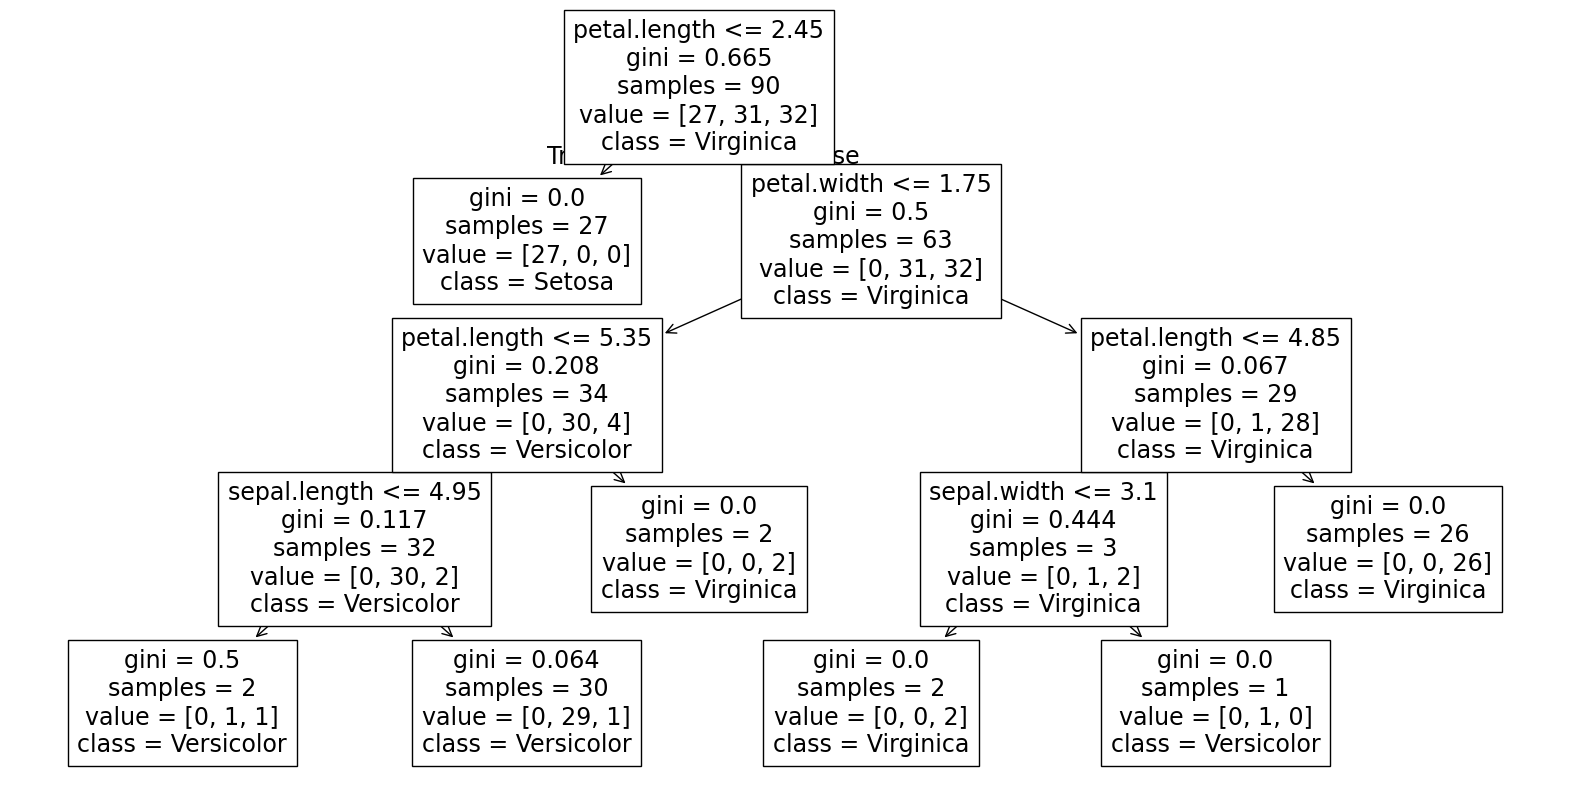

In [36]:
plt.figure(figsize=(20,10))
tree.plot_tree(iris_clf, feature_names=feature_names, class_names=targets.unique())

plt.show()

In [37]:
y_pred = iris_clf.predict(X_test)

y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor'], dtype=object)

In [38]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9833333333333333


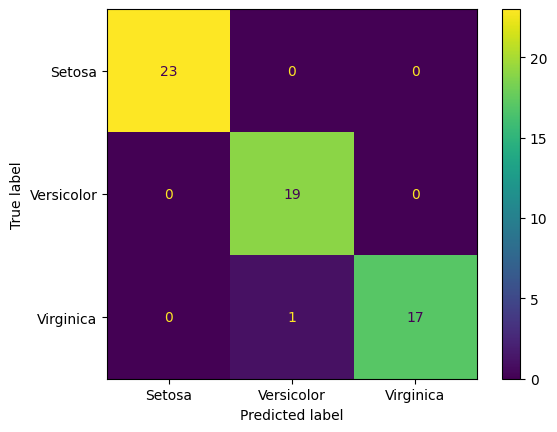

In [39]:
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=targets.unique())

cm_display.plot()

plt.grid(False)
plt.show()